In [2]:
!pip install -r https://raw.githubusercontent.com/malkiAbdelhamid/Advanced-Deep-Learning-2024-2025-esisba/master/lab1_QLearning/requirements_lab1.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninst

In [3]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy import random


#### 👉We are using the `Taxi-v3` environment from OpenAI's gym: https://gym.openai.com/envs/Taxi-v3/

#### 👉`Taxi-v3` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

#### Actions
There are 6 discrete deterministic actions:

- 0: move south

- 1: move north

- 2: move east

- 3: move west

- 4: pickup passenger

- 5: drop off passenger
#### Rewards
- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

In [5]:
env=gym.make("Taxi-v3",  render_mode="rgb_array")

In [6]:
class RandomAgent:

    def __init__(self,env):
        self.env=env

    def get_Random_Action(self):
         # -----add the code------------
         return random.choice(range(env.action_space.n))

### create a random Agent interacting with "Taxi-v3" environment

In [7]:
agent = RandomAgent(env)

### Train the Random agent on multiples episodes

In [10]:

n_episodes = 100

# For plotting metrics
timesteps_per_episode = []
cumReward_per_episode = []
penalties_per_episode = []

for i in tqdm(range(0, n_episodes)):

    # reset environment to a random state
    #--- add code here----------
    env.reset()

    # initialize the metrics
    steps, penalties, cum_reward, = 0, 0, 0
    done = False

    while not done:

        # select an action randomly
        action = random.choice(env.action_space.n)


        #execute the selected action on the environment and return the variables:
        #==>next_state, reward, terminated and truncated
        #--- add code here----------
        next_state, reward, terminated, truncated, info = env.step(action)


        if reward == -10:
            penalties += 1
        else:
            cum_reward+=reward


        steps += 1

        done=terminated or truncated


    timesteps_per_episode.append(steps)
    cumReward_per_episode.append(cum_reward)
    penalties_per_episode.append(penalties)

100%|██████████| 100/100 [00:01<00:00, 99.88it/s]


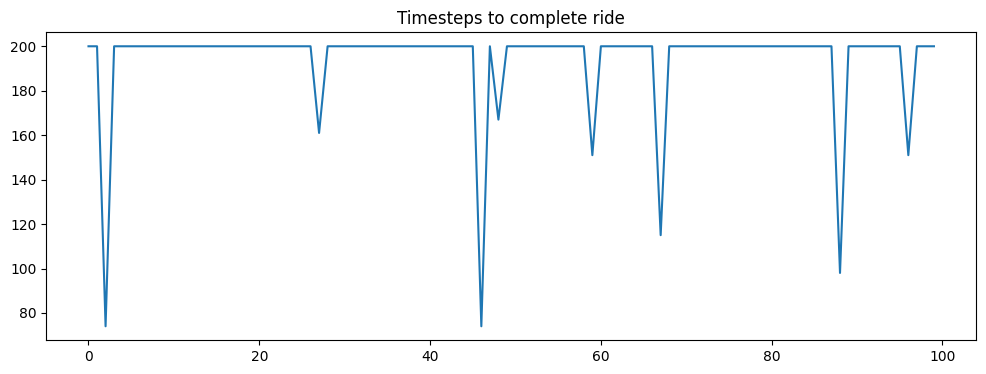

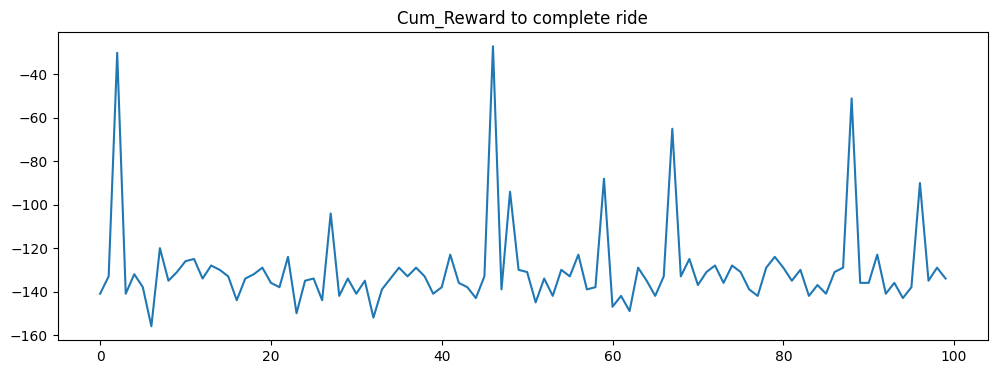

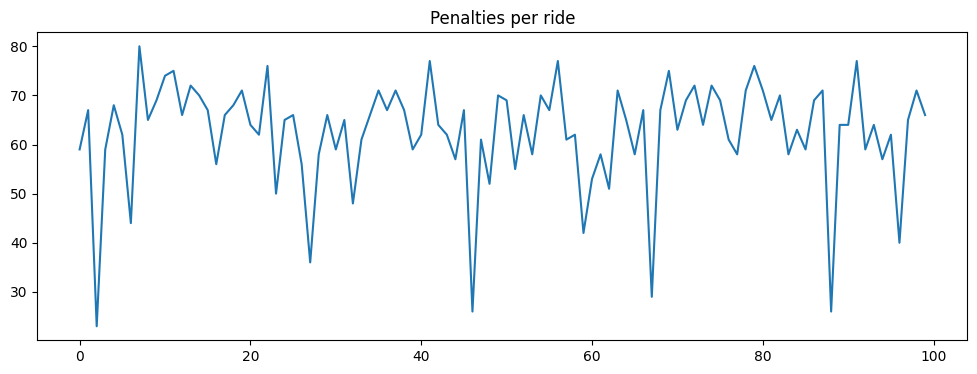

In [11]:

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cum_Reward to complete ride")
pd.Series( cumReward_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()